Adrian Kania, mikromacierze (Bioinformatyka 2 - mały)

<h2> Wizualizacja danych

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#dane
dane = np.array([1,1,2,2,2,2,3,4,4,3,2,3,4,3,3,3,5,4,4,4])

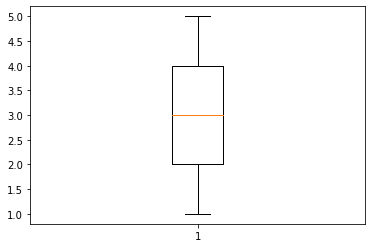

In [3]:
#boxplot
plt.boxplot(dane)
plt.show()

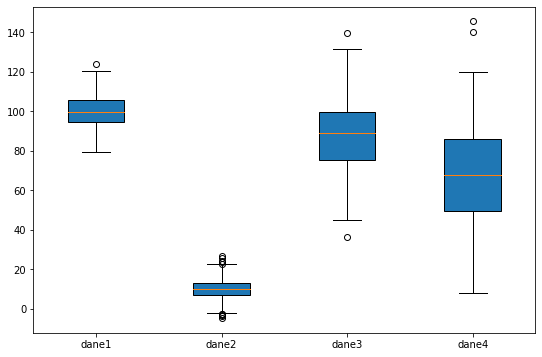

In [4]:
#wiele boxplotow na jednym wykresie

#Przygotowanie danych##################
dane1 = np.random.normal(100, 10, 200)
dane2 = np.random.normal(10,5, 1000)
dane3 = np.random.normal(90, 20, 200)
dane4 = np.random.normal(70, 25, 200)
dane = [dane1,dane2,dane3,dane4]
#######################################

#Rysowanie##############################################
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(dane, patch_artist=True) 
ax.set_xticklabels(['dane1', 'dane2', 'dane3', 'dane4'])
ax.get_xaxis().tick_bottom()
########################################################

<h3> Transformacja logarytmiczna

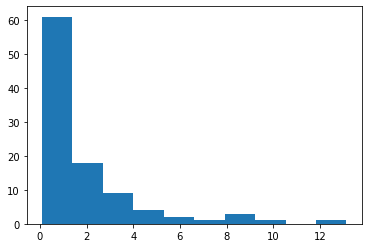

In [5]:
x = np.array([0.38, 0.56, 0.49, 9.67, 2.15, 3.69, 0.77, 0.29, 2.84, 8.28, 13.14, 1.52, 8.01, 0.9, 0.69, 1.72, 0.35, 3.05, 0.43, 3.75, 0.47, 0.18, 1.77, 0.71, 1.19, 0.77, 5.03, 0.43, 4.31, 0.09, 2.8, 0.21, 7.06, 1.52, 0.28, 2.83, 1.52, 0.61, 2.36, 1.14, 0.75, 1.73, 0.25, 0.85, 0.82, 0.92, 0.61, 5.32, 0.78, 0.69, 0.95, 1.54, 1.93, 0.14, 0.43, 0.14, 0.57, 1.21, 3.47, 1.87, 1.4, 1.05, 0.75, 0.36, 9.13, 0.66, 0.36, 0.39, 1.85, 0.35, 3.26, 1.91, 1.27, 1.52, 0.66, 0.42, 0.36, 1.03, 0.47, 1.33, 4.27, 0.67, 1.8, 0.19, 1.52, 1.3, 5.79, 0.5, 0.69, 0.44, 1.32, 3.72, 0.82, 0.97, 1.64, 4.97, 0.15, 0.62, 0.59, 0.17])
plt.hist(x, bins = 10)
plt.show()

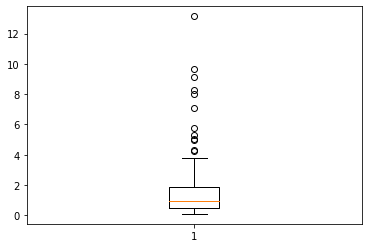

In [6]:
plt.boxplot(x)
plt.show()

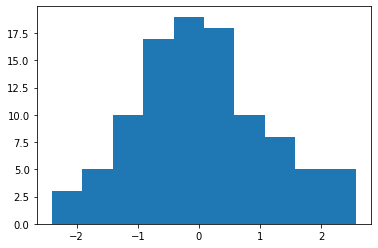

In [7]:
plt.hist(np.log(x), bins = 10)
plt.show()

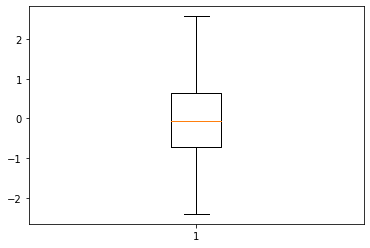

In [9]:
plt.boxplot(np.log(x))
plt.show()

<h2> Elementy statystyki

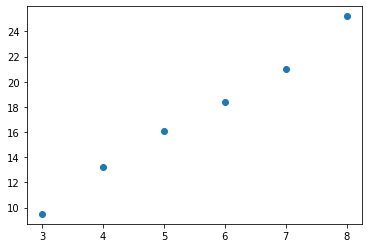

In [8]:
x = np.array([3,4,5,6,7,8])
y = np.array([9.5, 13.2, 16.1, 18.4, 21, 25.2])

plt.scatter(x,y)
plt.show()

In [9]:
np.corrcoef(x,y) #macierz korelacji

array([[1.        , 0.99594958],
       [0.99594958, 1.        ]])

In [10]:
import pandas as pd

d = {'x1':[1,2,4,7,8],'x2':[-3,-5,1,2,10],'x3':[1,1,1,1,1]}
df = pd.DataFrame(d)
print(df)

   x1  x2  x3
0   1  -3   1
1   2  -5   1
2   4   1   1
3   7   2   1
4   8  10   1


In [11]:
df['x1'].describe() #stastystyczne podsumowanie kolumny 'x1'

count    5.00000
mean     4.40000
std      3.04959
min      1.00000
25%      2.00000
50%      4.00000
75%      7.00000
max      8.00000
Name: x1, dtype: float64

In [12]:
df.describe(include='all')

,x1,x2,x3
count,5.00000,5.000000,5.0
mean,4.40000,1.000000,1.0
std,3.04959,5.787918,0.0
min,1.00000,-5.000000,1.0
25%,2.00000,-3.000000,1.0
50%,4.00000,1.000000,1.0
75%,7.00000,2.000000,1.0
max,8.00000,10.000000,1.0


<h2> Klasteryzacja

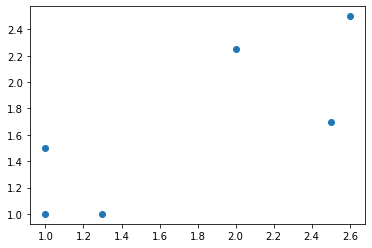

In [13]:
A = np.array([[1, 1], [1,1.5], [1.3,1],
              [2,2.25], [2.6,2.5], [2.5,1.7]])

plt.scatter(A[:, 0], A[:, 1])
plt.show()

<h3> K-means

In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,random_state=123) #podzial na 2 grupy
y = km.fit_predict(A) 

print(y)

[1 1 1 0 0 0]


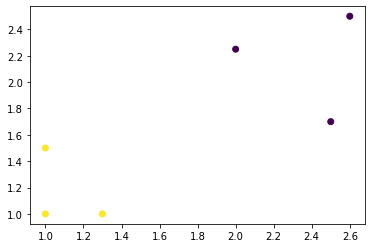

In [15]:
plt.scatter(A[:, 0], A[:, 1], c =y)
plt.show()

<h4> Ale...

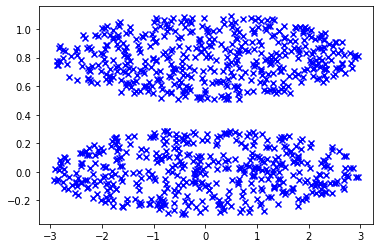

In [16]:
import random

n=10000
x=np.random.uniform(-4,4,n)
y=np.random.uniform(-4,4,n)

x1=[]
y1=[]
for i in range(n):
    if ((x[i])**2)/3**2+((y[i])**2)/0.3**2<=1 or ((x[i])**2)/3**2+((y[i]-0.8)**2)/0.3**2<=1:
        x1.append(x[i])
        y1.append(y[i])
        
A=np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(A[:,0],A[:,1],marker="x",c="blue")
plt.show()

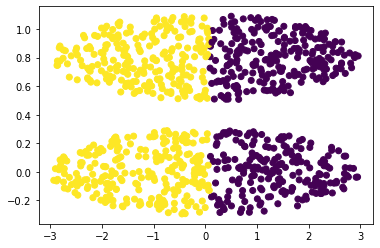

In [17]:
km = KMeans(n_clusters=2,random_state=123)
y = km.fit_predict(A) 
plt.scatter(A[:, 0], A[:, 1], c=y)
plt.show()

<h3> DBSCAN

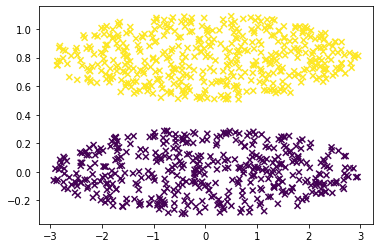

In [18]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.2, min_samples=2).fit(A)
plt.scatter(x1,y1,marker="x",c=clustering.labels_)
plt.show()

<h2> Redukcja wymiaru

In [21]:
from sklearn.decomposition import PCA

<h4> Przykład 1

In [22]:
d = {'x1':[1,2,4,7,8],'x2':[-3,-5,1,2,10],'x3':[1,1,1,1,1]}
df = pd.DataFrame(d)
print(df)

   x1  x2  x3
0   1  -3   1
1   2  -5   1
2   4   1   1
3   7   2   1
4   8  10   1


In [23]:
pca = PCA(n_components=2)
pca.fit(df)
X_pca = pca.transform(df)

print(X_pca)  #dane po redukcji wymiaru

[[-5.09089899 -1.28169709]
 [-6.44287519  0.49935888]
 [-0.17681086 -0.35880067]
 [ 2.04627226  1.8901772 ]
 [ 9.66431278 -0.74903831]]


In [24]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.96404981, 0.03595019, 0.        ])

In [25]:
X_new = pca.inverse_transform(X_pca) #powrot do wyjsciowych danych
print(X_new)

[[ 1. -3.  1.]
 [ 2. -5.  1.]
 [ 4.  1.  1.]
 [ 7.  2.  1.]
 [ 8. 10.  1.]]


<h4> Przykład 2

In [26]:
d = {'x1':[1,2,4,7,8],'x2':[-3,-5,1,2,10],'x3':[1,1,1,1,2]}
df = pd.DataFrame(d)
print(df)

   x1  x2  x3
0   1  -3   1
1   2  -5   1
2   4   1   1
3   7   2   1
4   8  10   2


In [27]:
pca = PCA(n_components=2)
pca.fit(df)
X_pca = pca.transform(df)

print(X_pca)  #dane po redukcji wymiaru

[[-5.09352388 -1.28542993]
 [-6.4436713   0.47188515]
 [-0.18811679 -0.33275422]
 [ 2.03053548  1.91570236]
 [ 9.6947765  -0.76940335]]


In [28]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(df)
pca.explained_variance_ratio_

array([9.62860692e-01, 3.63234193e-02, 8.15889030e-04])

In [29]:
X_new = pca.inverse_transform(X_pca) #powrot do wyjsciowych danych
print(X_new)

[[ 1. -3.  1.]
 [ 2. -5.  1.]
 [ 4.  1.  1.]
 [ 7.  2.  1.]
 [ 8. 10.  2.]]


<h2> Przykład praktyczny

In [1]:
from sklearn import datasets

bc = datasets.load_breast_cancer()

In [2]:
print("Labels: ", bc.target_names) #na jakie kategorie dane są podzielone

Labels:  ['malignant' 'benign']


In [3]:
print("Features: ", bc.feature_names) #jakie cechy były brane pod uwagę, łącznie 30

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
X, y = bc.data, bc.target

In [5]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
from sklearn.preprocessing import StandardScaler #Biblioteka do standaryzacji danych
sc = StandardScaler() #standaryzacja danych    
Xs = sc.fit_transform(X)

In [11]:
pca = PCA(n_components=2)
pca.fit(Xs)
X_pca = pca.transform(Xs)

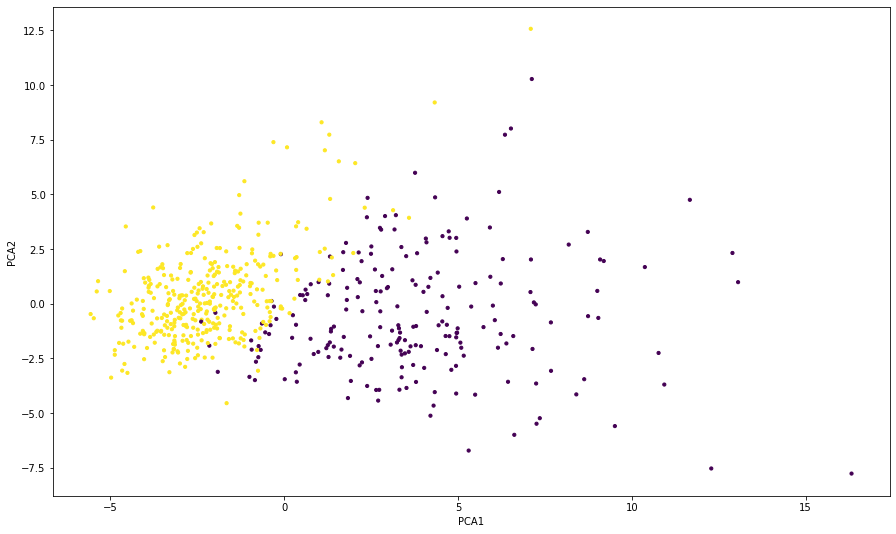

In [12]:
plt.figure(figsize=(15,9))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c =y, s = 10) #koloruje względem zadanego podzialu
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [19]:
km = KMeans(n_clusters=2,random_state=123) #podzial na 2 grupy
y_pred = km.fit_predict(X_pca) 

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

C:\Users\48795\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [17]:
y_pred2 = []
for elem in y_pred:
    if elem == 0:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [18]:
np.sum(y == y_pred2)/len(y) #ile wynikow zostalo poprawnie sklasyfikowanych

0.9068541300527241